In [1]:
!python -V

Python 3.10.12


# WARMING UP - OPEN AI LLM

In [36]:
import os
import openai
import tiktoken
from dotenv import load_dotenv, find_dotenv
_ = load_dotenv(find_dotenv()) # read local .env file

openai.api_key  = os.environ['OPENAI_API_KEY']

## Working with Agent

With the chat agent, you can engage in dynamic conversations where the agent retains context throughout the discussion. This enables you to have more interactive and meaningful exchanges.

#### Key Features

- Context Retention: The agent remembers the conversation history, allowing for seamless, context-aware interactions.

- Clarification Questions: You can use the clarification_questions method to request clarification on any aspect of the conversation. This helps ensure you fully understand the information provided.

- Explanation: The explain method is available to obtain detailed explanations of how the agent arrived at a particular solution or response. It offers transparency and insights into the agent's decision-making process.

#### Description for an Agent

When you instantiate an agent, you can provide a description of the agent. THis description will be used to describe the agent in the chat and to provide more context for the LLM about how to respond to queries.

Some examples of descriptions can be:

- You are a data analysis agent. Your main goal is to help non-technical users to analyze data
- Act as a data analyst. Every time I ask you a question, you should provide the code to visualize the answer using plotly
- E.g ```agent = Agent(
    "data.csv",
    description="You are a data analysis agent. Your main goal is to help non-technical users to analyze data",
)```

#### Add Skills to the Agent

You can add customs functions for the agent to use, allowing the agent to expand its capabilities. These custom functions can be seamlessly integrated with the agent's skills, enabling a wide range of user-defined operations.


In [4]:
import pandas as pd
from pandasai import Agent

from pandasai.llm.openai import OpenAI

employees_data = {
    "EmployeeID": [1, 2, 3, 4, 5],
    "Name": ["John", "Emma", "Liam", "Olivia", "William"],
    "Department": ["HR", "Sales", "IT", "Marketing", "Finance"],
}

salaries_data = {
    "EmployeeID": [1, 2, 3, 4, 5],
    "Salary": [5000, 6000, 4500, 7000, 5500],
}

employees_df = pd.DataFrame(employees_data)
salaries_df = pd.DataFrame(salaries_data)


llm = OpenAI()
agent = Agent([employees_df, salaries_df], config={"llm": llm}, memory_size=10)

# Chat with the agent
response = agent.chat("Who gets paid the most?")
print(response)

# Get Clarification Questions
questions = agent.clarification_questions(["Who gets paid the most?"])

for question in questions:
    print(question)

# Explain how the chat response is generated
response = agent.explain()
print(response)

The employee who gets paid the most is Olivia from the Marketing department with a salary of $7000.
Is the salary information provided in the same currency for all employees?
Are there any bonuses or additional compensation included in the salary data?
Is there a specific time period for the salaries mentioned, such as monthly or yearly?
I combined the information from two different sources to find out who gets paid the most. I then identified the employee with the highest salary and extracted their name, department, and salary to create a sentence stating who it is and how much they earn.


In [5]:
import pandas as pd
from pandasai import Agent

from pandasai.llm.openai import OpenAI


job_titles = pd.read_csv("job_title_data_NC.csv")


llm = OpenAI()
agent = Agent([job_titles], config={"llm": llm}, memory_size=5)

# Chat with the agent

# QUERY = "Which Employer pays the highest WAGE_RATE_OF_PAY_FROM_NORMALIZED in CHARLOTTE?"
QUERY = "Which Job Title is hired the most in Charlotte?"

response = agent.chat(QUERY)
print(response)

# Get Clarification Questions
questions = agent.clarification_questions([QUERY])

for question in questions:
    print(question)

# Explain how the chat response is generated
response = agent.explain()
print(response)

The most hired job title in Charlotte is: SENIOR DATA ENGINEER
Can you provide more information about the dataset being used to determine the most hired job title in Charlotte?
Are we looking at a specific time period or is this based on all available data?
Is the term 'hired' referring to the number of job openings or the number of individuals hired for a particular job title in Charlotte?
I looked at the data for jobs in Charlotte and filtered it to only include those in Charlotte. Then, I counted how many times each job title appeared and found the one that appeared the most. Finally, I put together a sentence to show which job title is hired the most in Charlotte.


In [6]:
job_titles[job_titles["Worksite City 1"]=="CHARLOTTE"].groupby(["Job Title"]).agg({"WAGE_RATE_OF_PAY_FROM_NORMALIZED":"count"}).reset_index().sort_values(by=["WAGE_RATE_OF_PAY_FROM_NORMALIZED"],ascending=False)


,Job Title,WAGE_RATE_OF_PAY_FROM_NORMALIZED
274,SENIOR DATA ENGINEER,194
67,DATA ENGINEER,145
48,DATA ANALYST,82
293,SENIOR DATA SCIENTIST,49
125,DATABASE ADMINISTRATOR,47
...,...,...
183,ETL BIG DATA SENIOR SOFTWARE ENGINEER (017040....,1
182,ENTERPRISE DATA PLATFORM – DATA ENGINEER,1
59,DATA ANALYTICS MANAGER,1
275,SENIOR DATA ENGINEER (017040.000173),1


### GDK backend error sometimes
- in the output of the below cell
- https://github.com/pylint-dev/pylint/issues/5251

Unable to init server: Could not connect: Connection refused

(eog:585006): Gtk-WARNING **: 11:30:12.007: cannot open display: 


Exception in APILogger: {"message":"Error: Invalid API Key","data":null}
/home/ubuntu/git-projects/personal/github.com/jupyter_notebooks_experiments/generative_ai/pandasai/7121775a-8705-4a71-80f7-5b1b8bb131f2.png


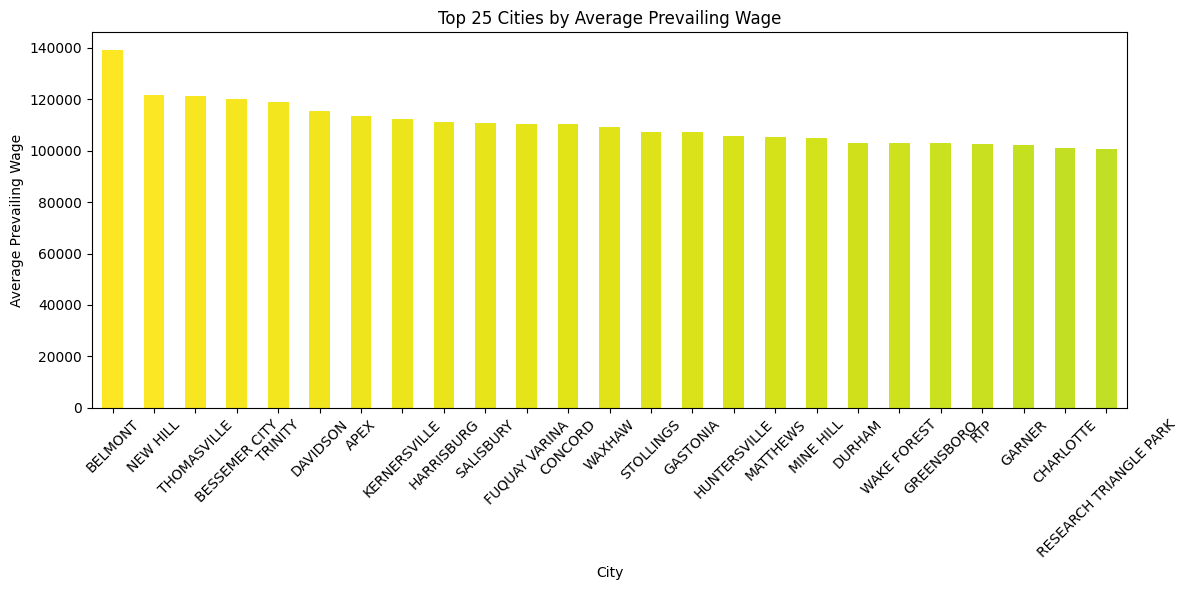

In [10]:
import os
from pandasai import SmartDataframe
from pandasai.llm.openai import OpenAI

llm = OpenAI()

user_defined_path = os.getcwd()

# By default, unless you choose a different LLM, it will use BambooLLM.
# You can get your free API key signing up at https://pandabi.ai (you can also configure it in your .env file)
# os.environ["PANDASAI_API_KEY"] = "YOUR_API_KEY"

sdf = SmartDataframe("job_title_data_NC.csv", config={
    "llm": llm,
    "save_charts": True,
    "save_charts_path": user_defined_path,
})
response = sdf.chat(
    "Plot the histogram of top 25 cities in decreasing order of average prevailing wage,"
    " using different colors for each bar.",
)
print(response)
# Output: check out $pwd/exports/charts/{hashid}/chart.png

In [18]:
import os
import pandas as pd
from pandasai import Agent
from pandasai.skills import skill
from pandasai.llm.openai import OpenAI

llm = OpenAI()
user_defined_path = os.getcwd()


employees_data = {
    "EmployeeID": [1, 2, 3, 4, 5],
    "Name": ["John", "Emma", "Liam", "Olivia", "William"],
    "Department": ["HR", "Sales", "IT", "Marketing", "Finance"],
}

salaries_data = {
    "EmployeeID": [1, 2, 3, 4, 5],
    "Salary": [5000, 6000, 4500, 7000, 5500],
}

employees_df = pd.DataFrame(employees_data)
salaries_df = pd.DataFrame(salaries_data)


@skill
def plot_salaries(merged_df: pd.DataFrame):
    """
    Displays the bar chart having name on x-axis and salaries on y-axis using streamlit
    """
    import matplotlib.pyplot as plt

    plt.bar(merged_df["Name"], merged_df["Salary"])
    plt.xlabel("Employee Name")
    plt.ylabel("Salary")
    plt.title("Employee Salaries")
    plt.xticks(rotation=45)
    plt.savefig("exports/charts/temp_chart.png")
    plt.close()

# By default, unless you choose a different LLM, it will use BambooLLM.
# You can get your free API key signing up at https://pandabi.ai (you can also configure it in your .env file)
# os.environ["PANDASAI_API_KEY"] = "YOUR_API_KEY"

agent = Agent([employees_df, salaries_df], config={"llm": llm,}, memory_size=10)
agent.add_skills(plot_salaries)

# Chat with the agent
response = agent.chat("Plot the employee salaries against names")
print(response)

Unable to init server: Could not connect: Connection refused

(eog:586687): Gtk-WARNING **: 11:52:42.048: cannot open display: 


Exception in APILogger: {"message":"Error: Invalid API Key","data":null}
/home/ubuntu/git-projects/personal/github.com/jupyter_notebooks_experiments/generative_ai/NL2SQL/pandasai/exports/charts/temp_chart.png


## Multiple data frames

In [20]:
import os
from pandasai import SmartDatalake
import pandas as pd
from pandasai.llm.openai import OpenAI

llm = OpenAI()

employees_data = {
    'EmployeeID': [1, 2, 3, 4, 5],
    'Name': ['John', 'Emma', 'Liam', 'Olivia', 'William'],
    'Department': ['HR', 'Sales', 'IT', 'Marketing', 'Finance']
}

salaries_data = {
    'EmployeeID': [1, 2, 3, 4, 5],
    'Salary': [5000, 6000, 4500, 7000, 5500]
}

employees_df = pd.DataFrame(employees_data)
salaries_df = pd.DataFrame(salaries_data)

# By default, unless you choose a different LLM, it will use BambooLLM.
# You can get your free API key signing up at https://pandabi.ai (you can also configure it in your .env file)
# os.environ["PANDASAI_API_KEY"] = "YOUR_API_KEY"

lake = SmartDatalake([employees_df, salaries_df],config={"llm": llm})
response = lake.chat("Who gets paid the most?")
print(response)
# Output: Olivia gets paid the most.

Exception in APILogger: {"message":"Error: Invalid API Key","data":null}
The employee who gets paid the most is Olivia from the Marketing department with a salary of $7000.


## Local LLM - Ollama
- `export OLLAMA_HOST=0.0.0.0 && ollama serve`
- `ollama run llama3`
- **If running on CPU only machine, can be slow depending on context and query - YMMV**

In [22]:
from pandasai import SmartDataframe
from pandasai.llm.local_llm import LocalLLM

llm = LocalLLM(api_base="http://192.168.0.111:11434/v1", model="phi3")
df = SmartDataframe("job_title_data_NC.csv", config={"llm": llm})

response = df.chat("Which Job Title is hired the most in Charlotte?")
print(response)


Exception in APILogger: {"message":"Error: Invalid API Key","data":null}
The most hired job title in Charlotte is: SENIOR DATA ENGINEER


## local llm Doesn't seem to work for smartdatalake 

In [6]:
import os
from pandasai import SmartDatalake
import pandas as pd
from pandasai.llm.local_llm import LocalLLM

# ollama models - phi3, llama3, mistral, mixtral, ..there are more, but because of disk space did not try
# all models fail with connection error - guess chain of calls is not working out well on local llm

llm = LocalLLM(api_base="http://192.168.0.111:11434/v1", model="llama3")

employees_data = {
    'EmployeeID': [1, 2, 3, 4, 5],
    'Name': ['John', 'Emma', 'Liam', 'Olivia', 'William'],
    'Department': ['HR', 'Sales', 'IT', 'Marketing', 'Finance']
}

salaries_data = {
    'EmployeeID': [1, 2, 3, 4, 5],
    'Salary': [5000, 6000, 4500, 7000, 5500]
}

employees_df = pd.DataFrame(employees_data)
salaries_df = pd.DataFrame(salaries_data)

# By default, unless you choose a different LLM, it will use BambooLLM.
# You can get your free API key signing up at https://pandabi.ai (you can also configure it in your .env file)
# os.environ["PANDASAI_API_KEY"] = "YOUR_API_KEY"

lake = SmartDatalake([employees_df, salaries_df],config={"llm": llm})
response = lake.chat("Who gets paid the most?")
print(response)
# Output: Olivia gets paid the most.

Unfortunately, I was not able to answer your question, because of the following error:

Connection error.



Traceback (most recent call last):
  File "/home/ubuntu/anaconda3/envs/py310/lib/python3.10/site-packages/httpx/_transports/default.py", line 69, in map_httpcore_exceptions
    yield
  File "/home/ubuntu/anaconda3/envs/py310/lib/python3.10/site-packages/httpx/_transports/default.py", line 233, in handle_request
    resp = self._pool.handle_request(req)
  File "/home/ubuntu/anaconda3/envs/py310/lib/python3.10/site-packages/httpcore/_sync/connection_pool.py", line 216, in handle_request
    raise exc from None
  File "/home/ubuntu/anaconda3/envs/py310/lib/python3.10/site-packages/httpcore/_sync/connection_pool.py", line 196, in handle_request
    response = connection.handle_request(
  File "/home/ubuntu/anaconda3/envs/py310/lib/python3.10/site-packages/httpcore/_sync/connection.py", line 99, in handle_request
    raise exc
  File "/home/ubuntu/anaconda3/envs/py310/lib/python3.10/site-packages/httpcore/_sync/connection.py", line 76, in handle_request
    stream = self._connect(request)
 

## Groq LLM
- `pip3 install langchain-groq==0.1.3`

In [5]:
import os
from pandasai import SmartDatalake
import pandas as pd
from langchain_groq.chat_models import ChatGroq


#model_name = mixtral-8x7b-32768, llama3-8b-8192, llama3-70b-8192, gemma-7b-it
# llama3-8b-8192 - doesn't give proper output
# mixtral-8x7b-32768 - great output
# llama3-70b-8192 - great output
# gemma-7b-it - great output

llm = ChatGroq(
    model_name="gemma-7b-it", 
    api_key = os.environ["GROQ_API_KEY"])

employees_data = {
    'EmployeeID': [1, 2, 3, 4, 5],
    'Name': ['John', 'Emma', 'Liam', 'Olivia', 'William'],
    'Department': ['HR', 'Sales', 'IT', 'Marketing', 'Finance']
}

salaries_data = {
    'EmployeeID': [1, 2, 3, 4, 5],
    'Salary': [5000, 6000, 4500, 7000, 5500]
}

employees_df = pd.DataFrame(employees_data)
salaries_df = pd.DataFrame(salaries_data)

# By default, unless you choose a different LLM, it will use BambooLLM.
# You can get your free API key signing up at https://pandabi.ai (you can also configure it in your .env file)
# os.environ["PANDASAI_API_KEY"] = "YOUR_API_KEY"

lake = SmartDatalake([employees_df, salaries_df],config={"llm": llm})
response = lake.chat("Who gets paid the most?")
print(response)
# Output: Olivia gets paid the most.

The employee who gets paid the most is Olivia from the Marketing department with a salary of $7000.



# Real Estate Dataset
- openai - wrong response
- groq mixtral-8x7b-32768 - results in exception

In [19]:
import os
import pandas as pd
from pandasai import SmartDataframe
from pandasai.llm.openai import OpenAI
from langchain_groq.chat_models import ChatGroq
from pandasai.llm.local_llm import LocalLLM

# llm = LocalLLM(api_base="http://192.168.0.111:11434/v1", model="llama3")
llm = ChatGroq(model_name="mixtral-8x7b-32768", api_key = os.environ["GROQ_API_KEY"])
# llm = OpenAI()

sdf = SmartDataframe("Real_Estate_Sales_2001-2017.parquet", config={"llm": llm})
response = sdf.chat('How many homes are in Andover town whose sale price is greater than the average sales price of all homes?')
print(response)


Unfortunately, I was not able to answer your question, because of the following error:

No code found in the response



Traceback (most recent call last):
  File "/home/ubuntu/anaconda3/envs/py310/lib/python3.10/site-packages/pandasai/pipelines/chat/code_execution.py", line 85, in execute
    result = self.execute_code(code_to_run, code_context)
  File "/home/ubuntu/anaconda3/envs/py310/lib/python3.10/site-packages/pandasai/pipelines/chat/code_execution.py", line 171, in execute_code
    exec(code, environment)
  File "<string>", line 4
SyntaxError: 'return' outside function

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/home/ubuntu/anaconda3/envs/py310/lib/python3.10/site-packages/pandasai/pipelines/chat/generate_chat_pipeline.py", line 307, in run
    output = (self.code_generation_pipeline | self.code_execution_pipeline).run(
  File "/home/ubuntu/anaconda3/envs/py310/lib/python3.10/site-packages/pandasai/pipelines/pipeline.py", line 137, in run
    raise e
  File "/home/ubuntu/anaconda3/envs/py310/lib/python3.10/site-packages/pandasai

### Lets try something simpler
- works well even for localLLM - ollama llama3/phi3/mistral

,Town,Number of Homes
0,Andover,614
1,Ansonia,3262
2,Ashford,820
3,Avon,4600
4,Barkhamsted,697
...,...,...
164,Windsor Locks,2767
165,Wolcott,3139
166,Woodbridge,1923
167,Woodbury,1995


/home/ubuntu/git-projects/personal/github.com/jupyter_notebooks_experiments/generative_ai/NL2SQL/pandasai/exports/charts/temp_chart.png


Unable to init server: Could not connect: Connection refused

(eog:611829): Gtk-WARNING **: 15:00:35.947: cannot open display: 


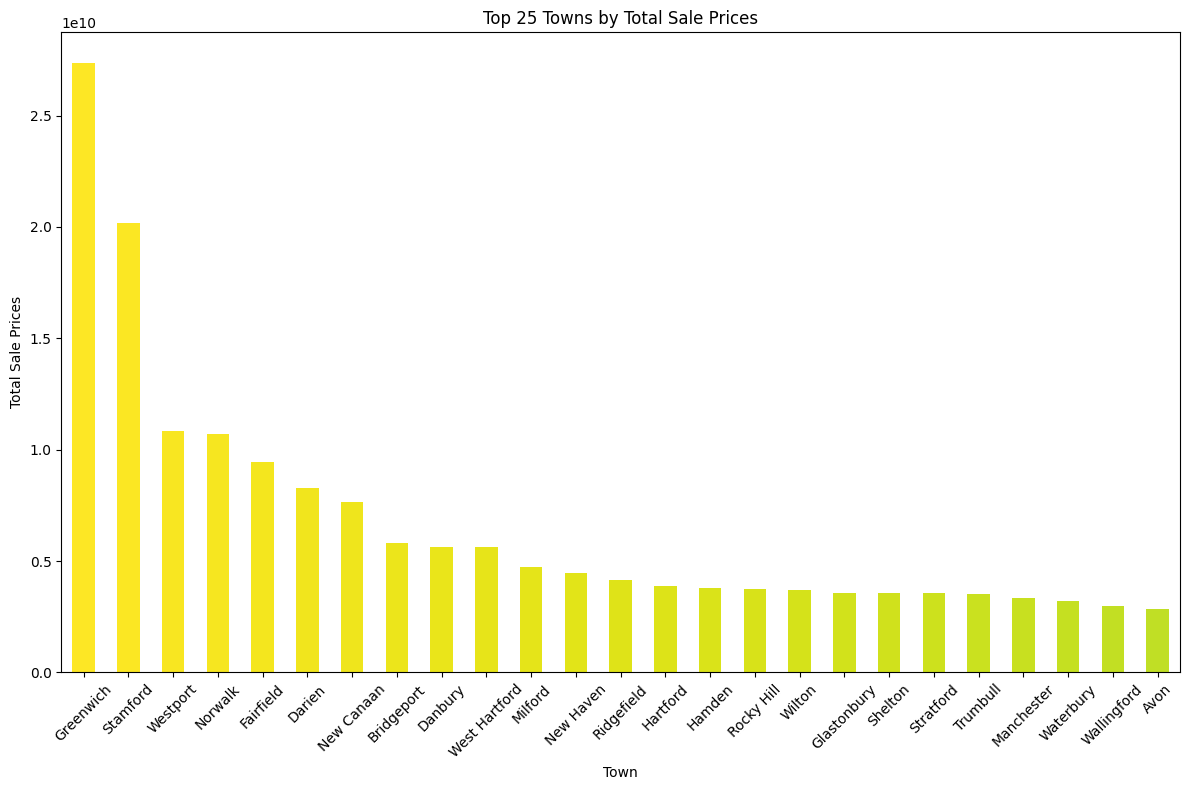

In [25]:
import os
import pandas as pd
from pandasai import SmartDataframe
from pandasai.llm.openai import OpenAI
from langchain_groq.chat_models import ChatGroq
from pandasai.llm.local_llm import LocalLLM
from IPython.display import display

llm = LocalLLM(api_base="http://192.168.0.111:11434/v1", model="phi3")
# llm = ChatGroq(model_name="mixtral-8x7b-32768", api_key = os.environ["GROQ_API_KEY"])
# llm = OpenAI()

sdf = SmartDataframe("Real_Estate_Sales_2001-2017.parquet", config={"llm": llm})
display(sdf.chat('How many homes are there in each town?'))

response = sdf.chat(
    "Plot a vertical bar graph of top 25 towns in decreasing order of total sale prices,"
    " using different colors for each bar.",
)
print(response)


### Too many calls to local llm results in error
- hence use cloud always
- Using mixtral-8x7b-32768 on grq or openai works as expected

<string>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


'/home/ubuntu/git-projects/personal/github.com/jupyter_notebooks_experiments/generative_ai/NL2SQL/pandasai/exports/charts/temp_chart.png'

Unable to init server: Could not connect: Connection refused

(eog:612658): Gtk-WARNING **: 15:10:02.453: cannot open display: 


'/home/ubuntu/git-projects/personal/github.com/jupyter_notebooks_experiments/generative_ai/NL2SQL/pandasai/exports/charts/temp_chart.png'

Unable to init server: Could not connect: Connection refused

(eog:612673): Gtk-WARNING **: 15:10:05.049: cannot open display: 


["What is the definition of a 'home' in this context (e.g., single-family residence, condo, etc.)?",
 'Should we include towns with no homes in the graph?',
 'Is there a preference for the color scheme used for the graph?']

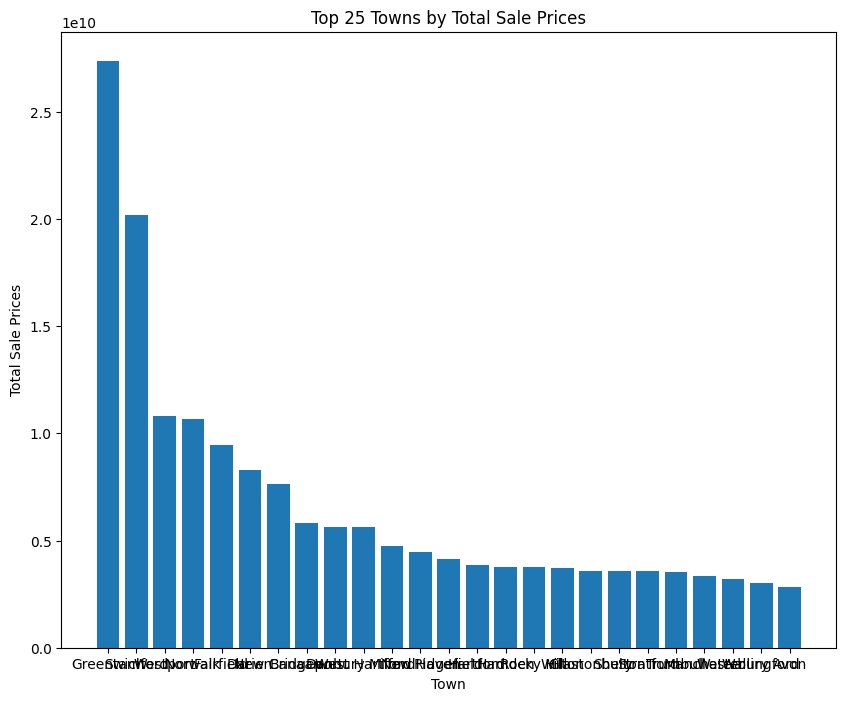

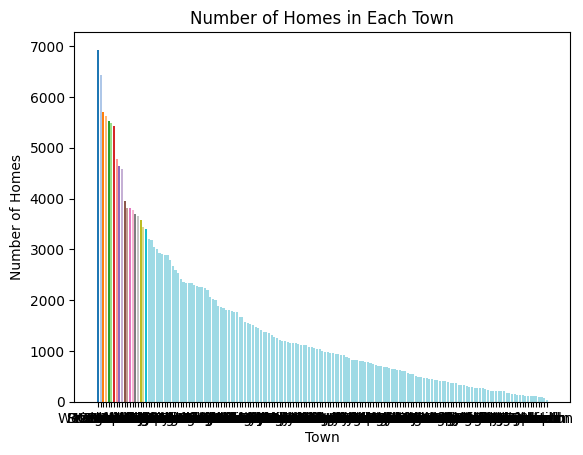

In [34]:
import os
import pandas as pd
from pandasai import Agent
from pandasai import SmartDataframe
from pandasai.llm.openai import OpenAI
from langchain_groq.chat_models import ChatGroq
from pandasai.llm.local_llm import LocalLLM
from IPython.display import display

# llm = LocalLLM(api_base="http://192.168.0.111:11434/v1", model="phi3")
llm = ChatGroq(model_name="mixtral-8x7b-32768", api_key = os.environ["GROQ_API_KEY"])
# llm = OpenAI()

agent = Agent([pd.read_parquet("Real_Estate_Sales_2001-2017.parquet")], config={"llm": llm}, memory_size=10)

# display(agent.chat('How many homes are there in each town?'))
# display(agent.clarification_questions('How many homes are there in each town ?'))

display(agent.chat('Plot a vertical bar graph of top 25 towns in decreasing order of total sale prices,?'))
display(agent.chat('Plot a vertical bar graph of number of homes in each town, using different colors for each bar.?'))
display(agent.clarification_questions('Plot a vertical bar graph of number of homes in each town, using different colors for each bar.?'))


## Claude LLM
- similar performance like groq or openai

<string>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


'/home/ubuntu/git-projects/personal/github.com/jupyter_notebooks_experiments/generative_ai/NL2SQL/pandasai/exports/charts/temp_chart.png'

Unable to init server: Could not connect: Connection refused

(eog:613611): Gtk-WARNING **: 15:21:32.135: cannot open display: 


'/home/ubuntu/git-projects/personal/github.com/jupyter_notebooks_experiments/generative_ai/NL2SQL/pandasai/exports/charts/temp_chart.png'

Unable to init server: Could not connect: Connection refused

(eog:613627): Gtk-WARNING **: 15:21:33.591: cannot open display: 


['What is the data source for the number of homes in each town?',
 'Should the bars be colored by a specific property of the homes (e.g. property type, residential type, etc.) or just randomly assigned colors?',
 'Should the graph show the total number of homes in each town or the count of unique homes?']

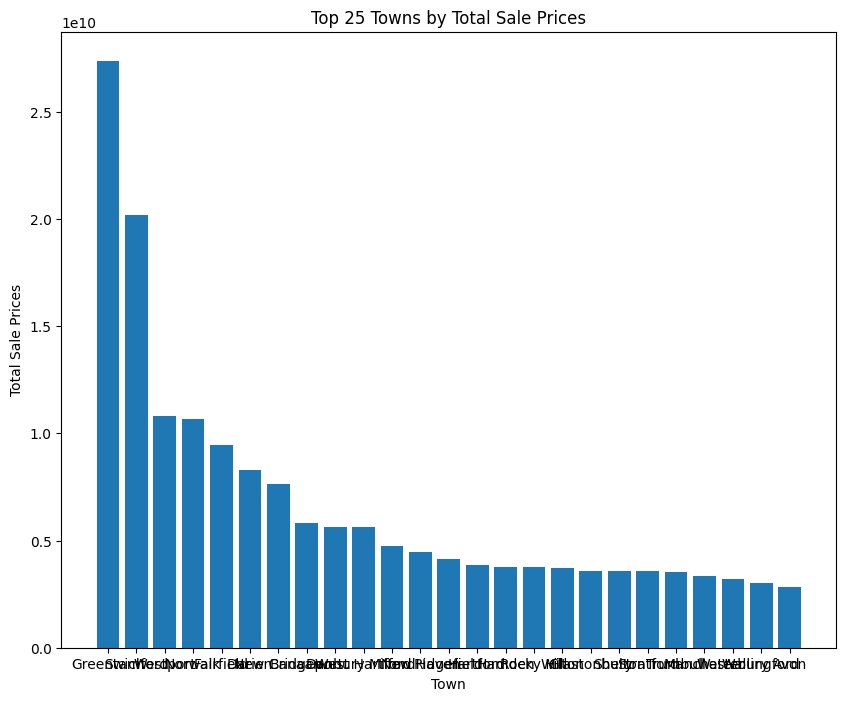

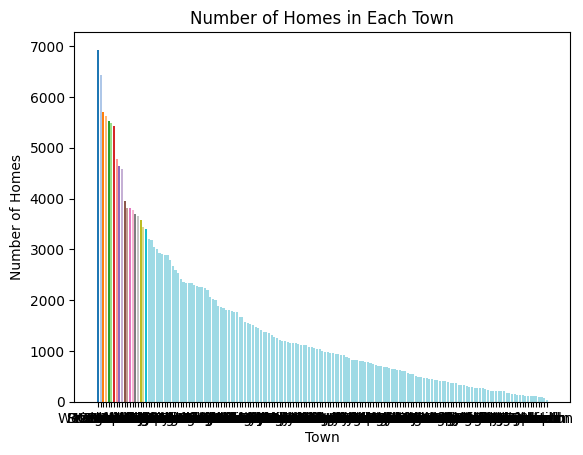

In [38]:
import os
import pandas as pd
from pandasai import Agent
from pandasai import SmartDataframe
from pandasai.llm.openai import OpenAI
from langchain_groq.chat_models import ChatGroq
from pandasai.llm.local_llm import LocalLLM
from langchain_anthropic import ChatAnthropic
from IPython.display import display

# llm = LocalLLM(api_base="http://192.168.0.111:11434/v1", model="phi3")
# llm = ChatGroq(model_name="mixtral-8x7b-32768", api_key = os.environ["GROQ_API_KEY"])
# llm = OpenAI()
llm = ChatAnthropic(model="claude-3-haiku-20240307")

agent = Agent([pd.read_parquet("Real_Estate_Sales_2001-2017.parquet")], config={"llm": llm}, memory_size=10)

# display(agent.chat('How many homes are there in each town?'))
# display(agent.clarification_questions('How many homes are there in each town ?'))

display(agent.chat('Plot a vertical bar graph of top 25 towns in decreasing order of total sale prices,?'))
display(agent.chat('Plot a vertical bar graph of number of homes in each town, using different colors for each bar.?'))
display(agent.clarification_questions('Plot a vertical bar graph of number of homes in each town, using different colors for each bar.?'))
